In [540]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import zscore
from scipy.stats import stats

# Misc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
%matplotlib inline

In [569]:
# load train set
df = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")

In [570]:
test = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv')

In [543]:
# First view of the train set
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [230]:
df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [231]:
df.shape, test.shape

((64376, 13), (685, 13))

In [571]:
#filtering out the Apple golden delicious
apples_df_filter = df[df['Commodities']== 'APPLE GOLDEN DELICIOUS']
apples_df = apples_df_filter.copy()
apples_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [572]:
#shape of the new train data
apples_df.shape

(1952, 13)

In [573]:
#descriptive statistics summary
apples_df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [235]:
test.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


In [169]:
apples_df.dtypes

Province             object
Container            object
Size_Grade           object
Weight_Kg           float64
Commodities          object
Date                 object
Low_Price           float64
High_Price          float64
Sales_Total         float64
Total_Qty_Sold        int64
Total_Kg_Sold       float64
Stock_On_Hand         int64
avg_price_per_kg    float64
dtype: object

## Analysis of the target variable

In [236]:
#summary of avg_price_per_kg
apples_df['avg_price_per_kg'].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

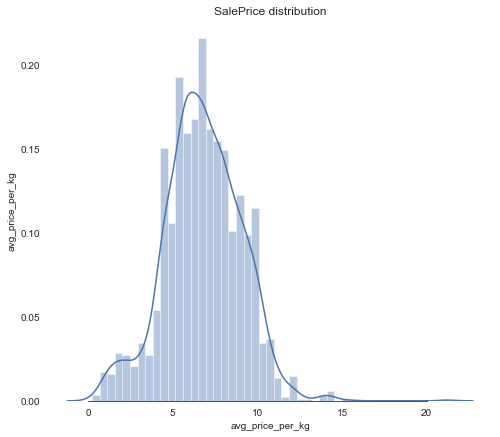

In [237]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(apples_df['avg_price_per_kg'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="avg_price_per_kg")
ax.set(xlabel="avg_price_per_kg")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

This above histogram:
- avg_price_per_kg is Fairly Symmetrical

In [238]:
#skewness and kurtosis
print("Skewness: %f" % apples_df['avg_price_per_kg'].skew())
print("Kurtosis: %f" % apples_df['avg_price_per_kg'].kurt())

Skewness: 0.082452
Kurtosis: 1.042921


The avg_price_per_kg is Fairly Symmetrical. The Kurtosis is low < 3 therefore means there is lack of outliers with this variable.


### Create Month column from Date 

In [574]:
apples_df['Date'] = pd.to_datetime(apples_df['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [575]:
apples_df["month"] = apples_df["Date"].dt.month
test["month"] = test["Date"].dt.month

## Relationship of avg_price_per_kg with numerical variables 

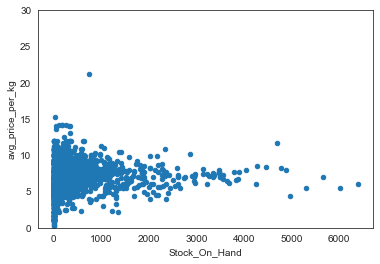

In [547]:
#scatter plot Stock_On_Hand/avg_price_per_kg
var = 'Stock_On_Hand'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

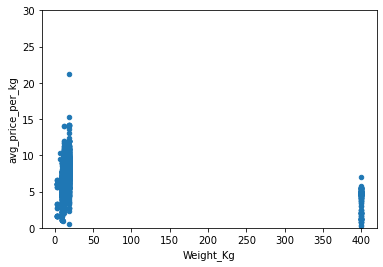

In [12]:
#scatter Weight_Kg/avg_price_per_kg
var = 'Weight_Kg'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

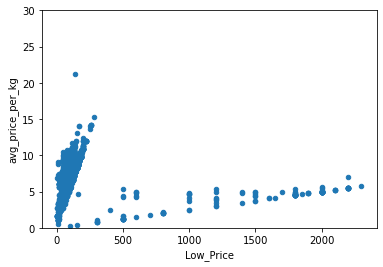

In [13]:
#scatter plot Low_Price/avg_price_per_kg
var = 'Low_Price'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

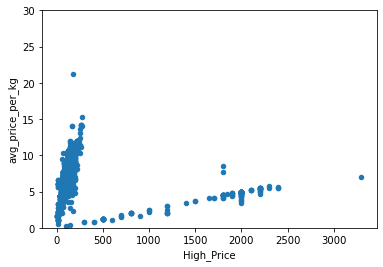

In [14]:
#scatter plot High_Price/avg_price_per_kg
var = 'High_Price'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

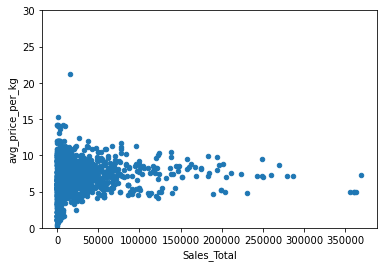

In [15]:
#scatter plot Sales_Total/avg_price_per_kg
var = 'Sales_Total'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

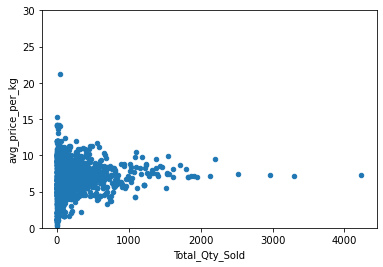

In [16]:
#scatter plot Total_Qty_Sold/avg_price_per_kg
var = 'Total_Qty_Sold'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

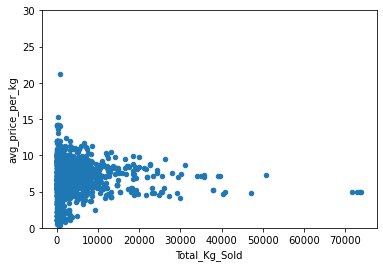

In [17]:
#scatter plot Total_Kg_Sold/avg_price_per_kg
var = 'Total_Kg_Sold'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

(array([18231., 18262., 18293., 18322., 18353., 18383., 18414., 18444.,
        18475., 18506., 18536.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

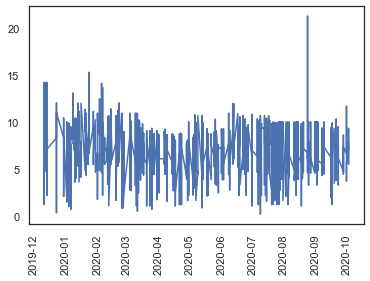

In [130]:
#Checking the relationship between date and avg_price_per_kg
apples_df = apples_df.sort_values('Date', ascending=True)
plt.plot(apples_df['Date'], apples_df['avg_price_per_kg'])
plt.xticks(rotation='vertical')

<AxesSubplot:>

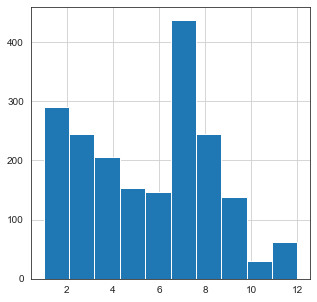

In [244]:
#month histogram distribution
#now checking the distribution of month alone 
apples_df['month'].hist(figsize = (5, 5))

## Relationship of avg_price_per_kg with categorical features


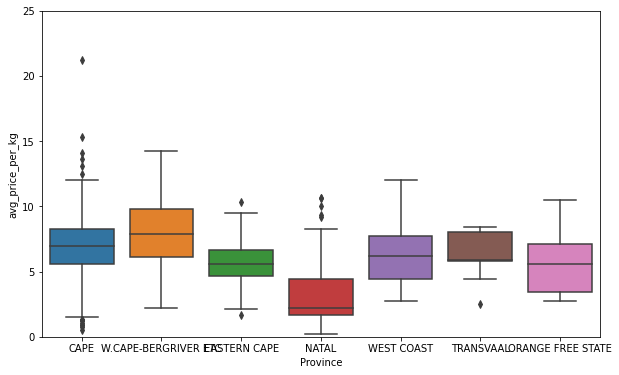

In [21]:
#box plot Province/avg_price_per_kg
var = 'Province'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

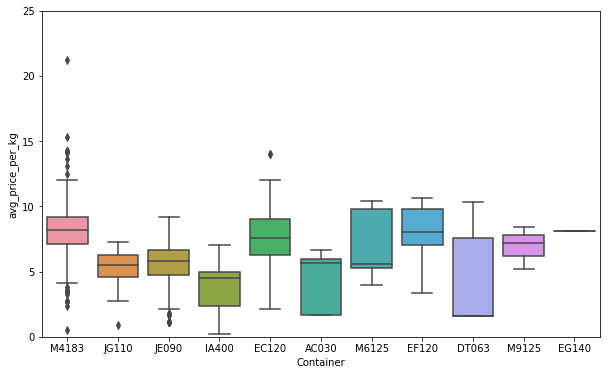

In [22]:
#box plot container/avg_price_per_kg
var = 'Container'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

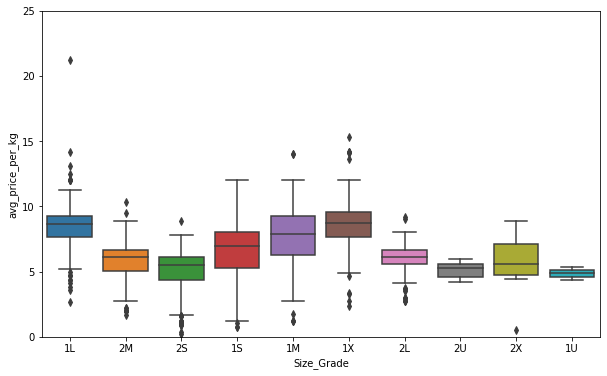

In [23]:
#box plot Size_Grade/avg_price_per_kg
var = 'Size_Grade'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

## Multiple variable analysis


In [245]:
apples_df.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.047613
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,0.039084
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,0.047717
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.055853
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.058639
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,-0.023098
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,-0.011749
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,0.005205
month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,0.005205,1.000000


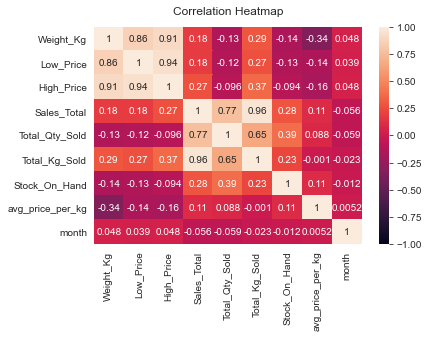

In [246]:
#correlation matrix
heatmap = sns.heatmap(apples_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**According to the heatmap above**
- Sales_Total, Total_Qty_Sold, Stock_on_hand and month have weak positive correlation with avg_price_per_kg.
- Weight_Kg , Low_price, High_price and Total_kg_Sold have weak negative correlation with avg_price_per_kg.

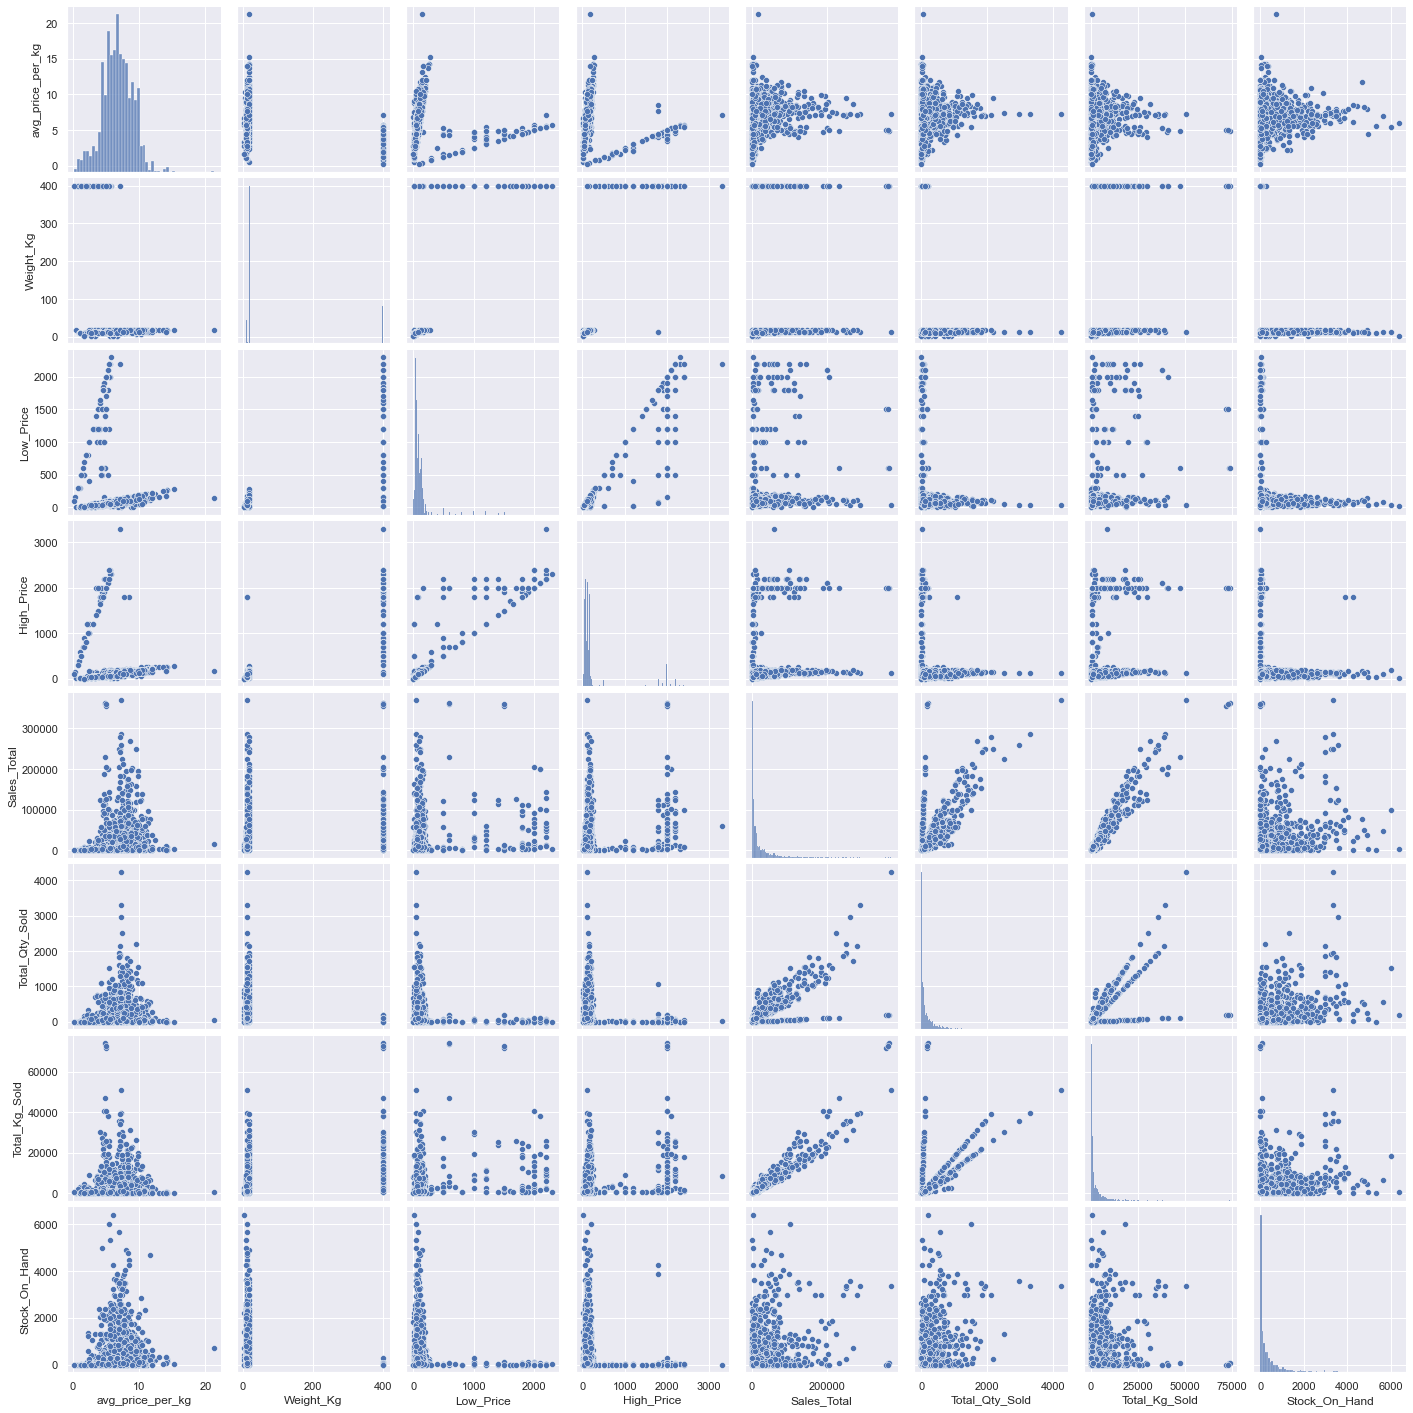

In [27]:
#scatterplot
sns.set()
cols = ['avg_price_per_kg', 'Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'month']
sns.pairplot(apples_df[cols], height = 2.5)
plt.show();

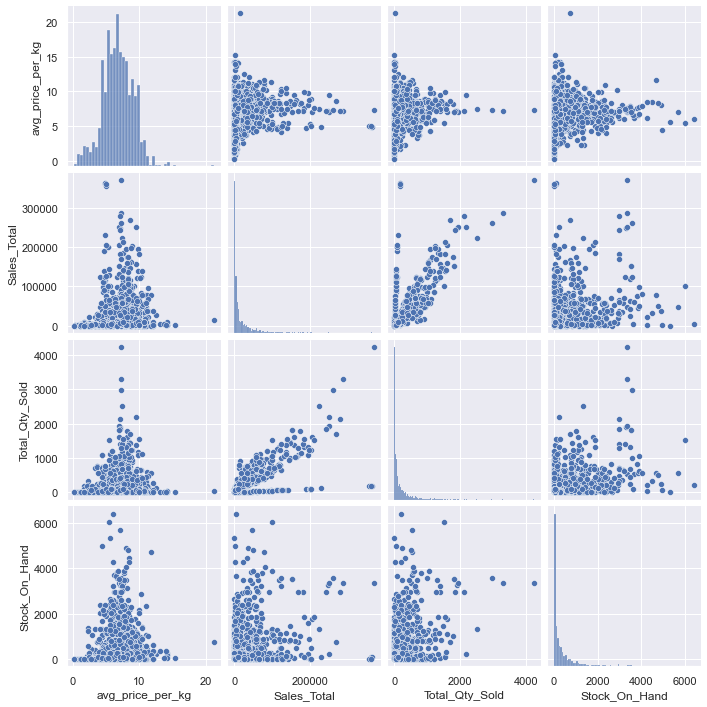

In [29]:
# positive correlation
sns.set()
cols = ['avg_price_per_kg', 'Sales_Total', 'Total_Qty_Sold', 'Stock_On_Hand', 'month']
sns.pairplot(apples_df[cols], height = 2.5)
plt.show();

## Standardising data to check for outliers 

In [548]:
#standardizing data
avg_price_perkg_scaled = StandardScaler().fit_transform(apples_df['avg_price_per_kg'][:,np.newaxis]);
low_range = avg_price_perkg_scaled[avg_price_perkg_scaled[:,0].argsort()][:10]
high_range= avg_price_perkg_scaled[avg_price_perkg_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.90409459]
 [-2.84626974]
 [-2.77065263]
 [-2.68169132]
 [-2.68169132]
 [-2.62386646]
 [-2.62386646]
 [-2.61052227]
 [-2.55714548]
 [-2.52156096]]

outer range (high) of the distribution:
[[3.0607613 ]
 [3.21199552]
 [3.21199552]
 [3.25647618]
 [3.3054049 ]
 [3.3054049 ]
 [3.3054049 ]
 [3.3054049 ]
 [3.79024404]
 [6.43239497]]


What does this mean?
 - Low range values are the same and not too far from 0
 - High range values are also similar but the 6.43239497 is far apart  and far from zero 
 - a possible outlier is around 6.43239497

## Drop outliers using Zcore

In [576]:
#first separate the numeric and categorical variables
num_train = apples_df.select_dtypes(include=["number"])
cat_train = apples_df.select_dtypes(exclude=["number"])

In [577]:
# Concatenate the variables again
idx = np.all(stats.zscore(num_train) < 3, axis=1)
train_cleaned = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)
train_cleaned.shape

(1713, 14)

## Log transformation of numerical variables

In [578]:
#This is to normalise the numerical variables MSE decreases if we dont log transform these variables
cats = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand','month']
for a in cats:
    train_cleaned[a] = train_cleaned[a].map(lambda i: np.log(i) if i > 0 else 0)
    #test[a] = test[a].map(lambda i: np.log(i) if i > 0 else 0)

In [426]:
train_cleaned.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month,Province,Container,Size_Grade,Commodities,Date
1,2.906901,5.010635,5.135798,10.853406,5.805135,8.712036,6.711740,8.51,2.197225,CAPE,M4183,1L,APPLE GOLDEN DELICIOUS,2020-09-09
7,2.397895,3.912023,3.912023,9.680344,5.768321,8.166216,0.000000,4.55,1.386294,CAPE,JG110,2M,APPLE GOLDEN DELICIOUS,2020-04-14
24,2.197225,4.007333,4.007333,6.897705,2.890372,5.087596,7.317212,6.11,1.386294,W.CAPE-BERGRIVER ETC,JE090,2S,APPLE GOLDEN DELICIOUS,2020-04-16
40,2.906901,4.382027,4.787492,10.374116,5.961005,8.867906,6.093570,4.51,1.609438,CAPE,M4183,1S,APPLE GOLDEN DELICIOUS,2020-05-04
80,2.197225,4.007333,4.007333,8.484670,4.477337,6.674561,5.198497,6.11,1.098612,CAPE,JE090,2S,APPLE GOLDEN DELICIOUS,2020-03-13


In [428]:
train_cleaned.dtypes

Weight_Kg                  float64
Low_Price                  float64
High_Price                 float64
Sales_Total                float64
Total_Qty_Sold             float64
Total_Kg_Sold              float64
Stock_On_Hand              float64
avg_price_per_kg           float64
month                      float64
Province                    object
Container                   object
Size_Grade                  object
Commodities                 object
Date                datetime64[ns]
dtype: object

In [427]:
test.dtypes

Index                      int64
Province                  object
Container                 object
Size_Grade                object
Weight_Kg                float64
Commodities               object
Date              datetime64[ns]
Low_Price                float64
High_Price               float64
Sales_Total              float64
Total_Qty_Sold             int64
Total_Kg_Sold            float64
Stock_On_Hand              int64
month                      int64
dtype: object

## Handling categorical variables

In [579]:
train_cleaned["Province"] = LabelEncoder().fit_transform(train_cleaned["Province"])
train_cleaned["Container"] = LabelEncoder().fit_transform(train_cleaned["Container"])
train_cleaned["Size_Grade"] = LabelEncoder().fit_transform(train_cleaned["Size_Grade"])

In [580]:
test["Province"] = LabelEncoder().fit_transform(test["Province"])
test["Container"] = LabelEncoder().fit_transform(test["Container"])
test["Size_Grade"] = LabelEncoder().fit_transform(test["Size_Grade"])

In [582]:
train_cleaned.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month,Province,Container,Size_Grade
Weight_Kg,1.000000,0.789295,0.858363,0.327960,0.064008,0.251047,0.197830,0.497439,-0.112495,-0.035598,0.566770,-0.601601
Low_Price,0.789295,1.000000,0.891213,0.311560,0.012556,0.161326,0.208955,0.821863,-0.066045,0.103730,0.369631,-0.572355
High_Price,0.858363,0.891213,1.000000,0.474335,0.180636,0.337409,0.316560,0.787046,-0.085579,-0.033126,0.394408,-0.625090
Sales_Total,0.327960,0.311560,0.474335,1.000000,0.948781,0.982255,0.223629,0.304057,-0.097132,-0.118683,0.127865,-0.292688
Total_Qty_Sold,0.064008,0.012556,0.180636,0.948781,1.000000,0.982059,0.147304,0.036201,-0.077239,-0.137807,0.004175,-0.103538
Total_Kg_Sold,0.251047,0.161326,0.337409,0.982255,0.982059,1.000000,0.180262,0.129110,-0.096177,-0.140395,0.111148,-0.214108
Stock_On_Hand,0.197830,0.208955,0.316560,0.223629,0.147304,0.180262,1.000000,0.227856,-0.040976,-0.221274,0.085121,-0.180069
avg_price_per_kg,0.497439,0.821863,0.787046,0.304057,0.036201,0.129110,0.227856,1.000000,-0.051726,0.104133,0.106055,-0.515029
month,-0.112495,-0.066045,-0.085579,-0.097132,-0.077239,-0.096177,-0.040976,-0.051726,1.000000,0.095456,-0.077052,0.019764
Province,-0.035598,0.103730,-0.033126,-0.118683,-0.137807,-0.140395,-0.221274,0.104133,0.095456,1.000000,-0.065525,-0.009747


In [553]:
train_cleaned.drop(['Commodities','Date'], axis = 1, inplace = True)
train_cleaned.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month,Province,Container,Size_Grade
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,0,7,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,4,0,6,6
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,4,5,5,7
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,5,0,7,2
80,9.0,55.0,55.0,4840.0,88,792.0,181,6.11,3,0,5,7


In [554]:
test.drop(['Commodities','Date'], axis = 1, inplace = True)
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,month
0,1,5,2,1,12.0,128.0,136.0,5008.0,38,456.0,0,7
1,2,5,8,4,18.3,220.0,220.0,1760.0,8,146.4,2,1
2,3,5,2,2,12.0,120.0,120.0,720.0,6,72.0,45,8
3,4,5,8,1,18.3,160.0,160.0,160.0,1,18.3,8,5
4,5,5,8,0,18.3,140.0,160.0,14140.0,100,1830.0,19,5


In [400]:
#train_df = pd.get_dummies(data = train_cleaned, columns = ['Province', 'Size_Grade'], drop_first = True)
#train_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month,Container,Commodities,Date,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,Province_TRANSVAAL,Province_W.CAPE-BERGRIVER ETC,Province_WEST COAST,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,2.906901,5.010635,5.135798,10.853406,5.805135,8.712036,6.711740,8.51,2.197225,M4183,APPLE GOLDEN DELICIOUS,2020-09-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2.397895,3.912023,3.912023,9.680344,5.768321,8.166216,0.000000,4.55,1.386294,JG110,APPLE GOLDEN DELICIOUS,2020-04-14,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
24,2.197225,4.007333,4.007333,6.897705,2.890372,5.087596,7.317212,6.11,1.386294,JE090,APPLE GOLDEN DELICIOUS,2020-04-16,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
40,2.906901,4.382027,4.787492,10.374116,5.961005,8.867906,6.093570,4.51,1.609438,M4183,APPLE GOLDEN DELICIOUS,2020-05-04,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
80,2.197225,4.007333,4.007333,8.484670,4.477337,6.674561,5.198497,6.11,1.098612,JE090,APPLE GOLDEN DELICIOUS,2020-03-13,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [401]:
#train_df.isnull().sum()

Weight_Kg                        0
Low_Price                        0
High_Price                       0
Sales_Total                      0
Total_Qty_Sold                   0
Total_Kg_Sold                    0
Stock_On_Hand                    0
avg_price_per_kg                 0
month                            0
Container                        0
Commodities                      0
Date                             0
Province_EASTERN CAPE            0
Province_NATAL                   0
Province_ORANGE FREE STATE       0
Province_TRANSVAAL               0
Province_W.CAPE-BERGRIVER ETC    0
Province_WEST COAST              0
Size_Grade_1M                    0
Size_Grade_1S                    0
Size_Grade_1U                    0
Size_Grade_1X                    0
Size_Grade_2L                    0
Size_Grade_2M                    0
Size_Grade_2S                    0
Size_Grade_2U                    0
Size_Grade_2X                    0
dtype: int64

In [402]:
#test_df = pd.get_dummies(data = test, columns = ['Province', 'Size_Grade'], drop_first = True)
#test_df.isnull().sum()

Index                            0
Weight_Kg                        0
Low_Price                        0
High_Price                       0
Sales_Total                      0
Total_Qty_Sold                   0
Total_Kg_Sold                    0
Stock_On_Hand                    0
month                            0
Province_EASTERN CAPE            0
Province_NATAL                   0
Province_ORANGE FREE STATE       0
Province_TRANSVAAL               0
Province_W.CAPE-BERGRIVER ETC    0
Province_WEST COAST              0
Size_Grade_1M                    0
Size_Grade_1S                    0
Size_Grade_1U                    0
Size_Grade_1X                    0
Size_Grade_2L                    0
Size_Grade_2M                    0
Size_Grade_2S                    0
Size_Grade_2U                    0
Size_Grade_2X                    0
dtype: int64

In [555]:
test.shape

(685, 12)

In [556]:
train_cleaned.shape

(1713, 12)

In [557]:
train_cleaned =train_cleaned.loc[:,~train_cleaned.columns.duplicated()]

In [558]:
test =test.loc[:,~test.columns.duplicated()]

In [559]:
train_cleaned.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month,Province,Container,Size_Grade
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,0,7,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,4,0,6,6
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,4,5,5,7
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,5,0,7,2
80,9.0,55.0,55.0,4840.0,88,792.0,181,6.11,3,0,5,7


In [560]:
#correlation
train_cleaned.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month,Province,Container,Size_Grade
Weight_Kg,1.000000,0.793893,0.882803,0.295567,0.019849,0.237463,0.107011,0.492860,-0.076332,-0.036290,0.603350,-0.631456
Low_Price,0.793893,1.000000,0.872611,0.200786,-0.062253,0.097729,0.025886,0.815544,-0.011264,0.139712,0.405020,-0.585479
High_Price,0.882803,0.872611,1.000000,0.371799,0.085026,0.274045,0.160419,0.763701,-0.043925,-0.030423,0.449437,-0.654208
Sales_Total,0.295567,0.200786,0.371799,1.000000,0.861513,0.967201,0.231615,0.228662,-0.122926,-0.148151,0.129330,-0.273927
Total_Qty_Sold,0.019849,-0.062253,0.085026,0.861513,1.000000,0.932626,0.220947,0.011603,-0.089338,-0.147516,-0.013786,-0.050004
Total_Kg_Sold,0.237463,0.097729,0.274045,0.967201,0.932626,1.000000,0.233279,0.102003,-0.106014,-0.158917,0.123931,-0.193267
Stock_On_Hand,0.107011,0.025886,0.160419,0.231615,0.220947,0.233279,1.000000,0.074820,-0.066755,-0.169645,0.035418,-0.085802
avg_price_per_kg,0.492860,0.815544,0.763701,0.228662,0.011603,0.102003,0.074820,1.000000,0.015284,0.104133,0.106055,-0.515029
month,-0.076332,-0.011264,-0.043925,-0.122926,-0.089338,-0.106014,-0.066755,0.015284,1.000000,0.083466,-0.057463,-0.004858
Province,-0.036290,0.139712,-0.030423,-0.148151,-0.147516,-0.158917,-0.169645,0.104133,0.083466,1.000000,-0.065525,-0.009747


In [561]:
from sklearn.model_selection import train_test_split 

X = train_cleaned.drop(['avg_price_per_kg'], 1)
y = train_cleaned['avg_price_per_kg'].values

x = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [562]:
x_test  = test.drop("Index", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1370, 11), (1370,), (343, 11), (343,))

## LinearRegression

In [563]:
## Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
## fit train and test data. 
lin_reg.fit(X_train, y_train)
## Predict test data. 
y_pred = lin_reg.predict(X_test)
y_pred

array([ 5.50631991,  6.80174481,  7.54783565,  5.67982637,  3.48553844,
        8.50228481,  8.89599845,  7.55296913,  5.45796814,  5.38845533,
        5.16061716,  7.53094239,  5.7371666 ,  8.47925691,  5.51040664,
       10.41815067,  4.73195277,  5.49085179,  7.91414072,  6.17805791,
        6.20651439,  5.2524559 ,  8.34419488, 10.8915896 ,  6.83399943,
        8.94460633,  7.37361931, 11.23482745,  6.55280611,  5.60963185,
        5.95060159,  6.62393046,  9.07245817, 10.2014411 ,  8.85237981,
        8.84422049,  9.64099692,  9.35377249,  8.56341443,  9.06758714,
        8.28063735,  5.8168529 ,  5.78103807,  5.55538133,  8.37486578,
        7.59797237,  7.84163489,  5.72797345,  7.1470896 ,  5.55722659,
        8.28459314,  9.09185633,  9.60305193, 10.0054902 , 10.58054432,
        7.12105026,  9.81866993,  5.78045483,  6.55024624,  7.45934488,
        7.9365198 ,  6.78661012,  9.04769588,  8.09204316,  6.06151979,
        4.18988937,  5.61490923,  9.77582293,  4.76925481,  8.24

In [583]:
print ('MSE Linear: %.2f'%mean_squared_error(y_test, y_pred))

MSE Linear: 0.62


## XG boost regression

In [565]:
xgb = XGBRegressor(learning_rate= 0.01, n_estimators= 1000, max_depth = 4 , min_child_weight = 2, max_delta_step = 1, subsample = 0.8, random_state=50)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=1, max_depth=4,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=50,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [567]:
y2_pred = xgb.predict(X_test)
y2_pred

array([ 5.565495 ,  6.9869785,  7.9871364,  5.655113 ,  4.0102   ,
        8.407606 ,  9.549045 ,  7.639799 ,  5.6121507,  5.611217 ,
        4.7776675,  7.1821895,  6.216177 ,  7.8727865,  5.7391896,
        9.065358 ,  4.298603 ,  4.921633 ,  7.870381 ,  6.385089 ,
        4.2389474,  4.882326 ,  8.281301 , 10.008654 ,  7.138704 ,
        8.610284 ,  7.342487 , 10.312946 ,  6.869855 ,  5.626918 ,
        6.2482443,  5.528849 ,  9.619232 ,  9.614313 ,  8.403023 ,
        8.577922 ,  9.004768 ,  9.618937 ,  8.351236 ,  9.619232 ,
        7.989115 ,  5.917543 ,  6.140908 ,  5.756634 ,  8.061509 ,
        7.8205776,  8.104162 ,  5.9194536,  7.482623 ,  6.3088446,
        8.544166 ,  9.826647 ,  9.153418 ,  9.607885 ,  9.781519 ,
        7.3115416,  9.911648 ,  5.9955816,  6.773304 ,  7.391619 ,
        7.5192285,  7.3571677,  9.617163 ,  7.639289 ,  6.0992594,
        3.3443074,  5.8133483,  8.99077  ,  4.509149 ,  8.492051 ,
        5.81404  ,  7.399987 ,  7.3973804,  5.257931 ,  8.9846

In [568]:
print ('MSE XG boost: %.2f'%mean_squared_error(y_test, y2_pred))

MSE XG boost: 0.40


## Decision Tree

In [450]:
regr_tree = DecisionTreeRegressor(max_depth=3,random_state=1000)

In [476]:
regr_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=1000)

In [453]:
# get predictions for test data
y3_pred = regr_tree.predict(X_test)
y3_pred
# calculate MSE
MSE2 = mean_squared_error(y3_pred,y_test)

# Report RMSE
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE2))

Regression Decision Tree model RMSE is: 1.0863603096296852


## Regulising linear model

### Ridge

In [459]:
# Create ridge model
ridge = Ridge()

In [460]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [462]:
# Extract the model intercept value
b0 = float(ridge.intercept_)
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [463]:
print("Intercept:", float(b0))

Intercept: 6.925824849860879


In [464]:
# Check out the coefficients
coeff

,Coefficient
Weight_Kg,-0.853016
Low_Price,0.269854
High_Price,0.230203
Sales_Total,8.013260
Total_Qty_Sold,-3.767179
Total_Kg_Sold,-3.815215
Stock_On_Hand,-0.050628
month,-0.052137
Province,0.048125
Container,-0.053602


In [465]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression

# Create model object
lm = LinearRegression()

# Train model
lm.fit(X_train, y_train)

LinearRegression()

In [466]:
# Import metrics module
from sklearn import metrics


In [467]:
# Check training accuracy
train_lm = lm.predict(X_train)
train_ridge = ridge.predict(X_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))
print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))

Training MSE
Linear: 0.36140075274074485
Ridge : 0.38945781812513147


In [468]:
test_lm = lm.predict(X_test)
test_ridge = ridge.predict(X_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))
print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))

Testing MSE
Linear: 0.2619109941099626
Ridge : 0.29508575442848445


## Random forest

In [519]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=1000, max_depth=10)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [520]:
#Get predictions
y_pred = RF.predict(X_test)
y_pred
# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.5775384427121891


## Gradient boosting

In [530]:
params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [531]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)

In [532]:
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.3402


In [536]:
submission = pd.DataFrame({
        "Index": test["Index"],
        "avg_price_per_kg": y2_pred
    })
submission.to_csv('submission.csv', index=False)

In [537]:
submission

,Index,avg_price_per_kg
0,1,8.532733
1,2,9.438367
2,3,9.387119
3,4,8.344487
4,5,7.182310
5,6,9.854321
6,7,9.905568
7,8,9.134412
8,9,9.854321
9,10,9.387119
